<a href="https://colab.research.google.com/github/gosenje1988/python-scientific/blob/master/Trabajo_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Print('2 - Sobre los datos de MNIST, intenten luego de clusterizar armar un clasificador.')**

#Importar librerías a utilizar

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import random
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import spectral_clustering
from sklearn.cluster import AgglomerativeClustering

#Carga y análisis exploratorio del dataset utilizado



 Dimensiones del dataset:

(1797, 64)

 Dimensiones del vector solución:

(1797,)

 Cantidad de imágenes de cada dígito:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
[[ 0.  0.  0.  8. 15.  1.  0.  0.]
 [ 0.  0.  1. 14. 13.  1.  1.  0.]
 [ 0.  0. 10. 15.  3. 15. 11.  0.]
 [ 0.  7. 16.  7.  1. 16.  8.  0.]
 [ 0.  9. 16. 13. 14. 16.  5.  0.]
 [ 0.  1. 10. 15. 16. 14.  0.  0.]
 [ 0.  0.  0.  1. 16. 10.  0.  0.]
 [ 0.  0.  0. 10. 15.  4.  0.  0.]]
4


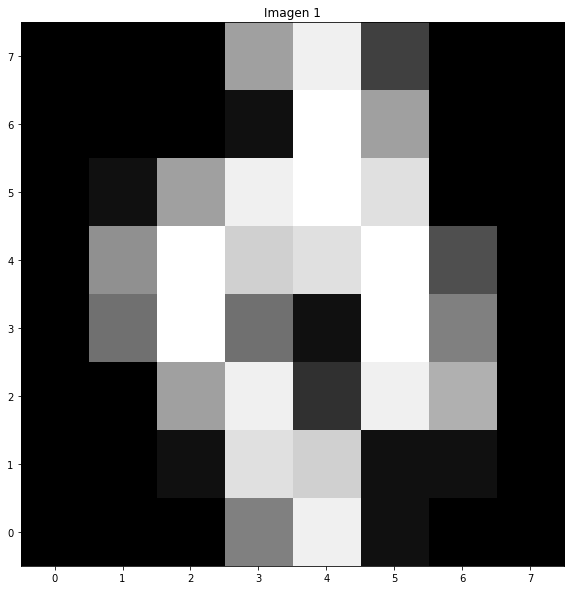

[[255. 255. 255. 247. 240. 254. 255. 255.]
 [255. 255. 254. 241. 242. 254. 254. 255.]
 [255. 255. 245. 240. 252. 240. 244. 255.]
 [255. 248. 239. 248. 254. 239. 247. 255.]
 [255. 246. 239. 242. 241. 239. 250. 255.]
 [255. 254. 245. 240. 239. 241. 255. 255.]
 [255. 255. 255. 254. 239. 245. 255. 255.]
 [255. 255. 255. 245. 240. 251. 255. 255.]]


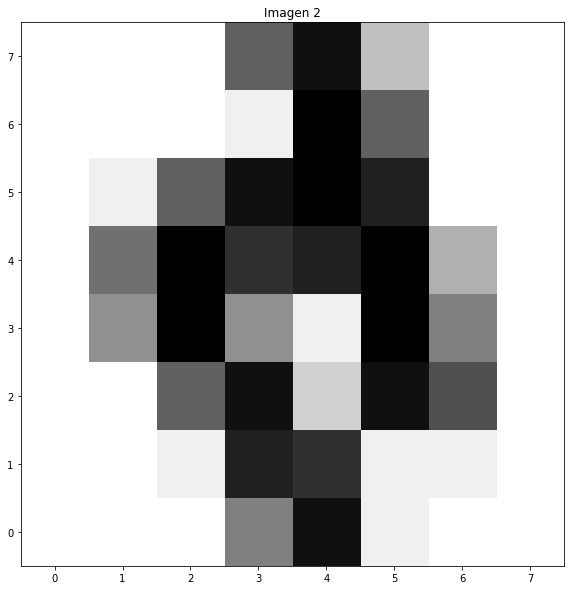

[[255. 255. 255. 243. 242. 250. 255. 255.]
 [255. 255. 255. 244. 239. 246. 255. 255.]
 [255. 255. 252. 240. 239. 249. 255. 255.]
 [255. 248. 240. 239. 239. 253. 255. 255.]
 [255. 255. 254. 239. 239. 252. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 255. 244. 239. 245. 255. 255.]]


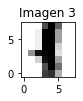

In [11]:
X,y= load_digits(return_X_y=True)
print("\n Dimensiones del dataset:\n")
print(X.shape)
print("\n Dimensiones del vector solución:\n")
print(y.shape)
print("\n Cantidad de imágenes de cada dígito:\n")
print(np.unique(y,return_counts=True)) #Se ve que las clases están muy balanceadas (entre 174 y 183 ncounts)
imagen=X[14,:].reshape(8,8) #Ahora vamos a imprimir una de las imágenes
print(imagen)
print(y[14])
plt.figure(figsize=(10,10))
plt.imshow(imagen,cmap=plt.cm.gray)
plt.title("Imagen 1")
plt.gca().invert_yaxis()
plt.show()
X=255-X #Ahora invertiremos los colores para ver las imágenes com mayor claridad...
imagen2=X[14,:].reshape(8,8) #...y volvemos a imprimir la misma imagen
print(imagen2)
plt.figure(figsize=(10,10))
plt.imshow(imagen2,cmap=plt.cm.gray)
plt.title("Imagen 2")
plt.gca().invert_yaxis()
plt.show()
imagen3=X[1,:].reshape(8,8) #Realizamos una 3er impresión de otra imagen
print(imagen3)
plt.figure(figsize=(1,1))
plt.imshow(imagen3,cmap=plt.cm.gray)
plt.title("Imagen 3")
plt.gca().invert_yaxis()
plt.show()

#Clusterización del dataset

In [14]:
random.seed(990)
np.random.seed(990) #Colocamos una semilla para poder replicar el experimento
modelo=KMeans(n_clusters=10,init='random').fit(X) #Armado del modelo
resultado=modelo.predict(X) #Predicción
print("\n Imprimimos algunos parámetros del modelo:\n")
print("\n Cantidad de clusters: {}\n".format(modelo.n_clusters))
print("Coeficioente de Silhouette: %0.3f" % metrics.silhouette_score(X,resultado))
print("\n Centros de cada uno de los clusters: {}\n".format(modelo.cluster_centers_))
print("Grupo al cual pertenece cada una de las imágenes:\n {}".format(resultado))


 Imprimimos algunos parámetros del modelo:


 Cantidad de clusters: 10

Coeficioente de Silhouette: 0.182

 Centros de cada uno de los clusters: [[255.         255.         254.69277108 247.8373494  243.05421687
  253.06626506 254.84939759 254.94578313 255.         254.98795181
  251.71686747 241.20481928 246.53614458 253.46987952 254.02409639
  254.72289157 255.         254.35542169 244.28915663 243.43975904
  250.6626506  249.74096386 251.12650602 254.6746988  254.9939759
  250.24096386 240.24096386 249.13855422 248.12048193 244.24698795
  248.78313253 254.98192771 255.         246.07228916 240.19277108
  245.64457831 242.18674699 240.60843373 249.51807229 255.
  254.90361446 248.4939759  243.31325301 242.65662651 240.1626506
  244.24096386 253.43373494 255.         254.93975904 253.88554217
  252.         247.22289157 240.91566265 250.86746988 254.98192771
  255.         255.         254.97590361 254.62650602 247.03614458
  242.6746988  253.22891566 255.         255.        ]
 [255